In [5]:
import sqlite3
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取資料

In [2]:
# 讀取 filtered_df 資料表
conn = sqlite3.connect("filtered_df.db")
df = pd.read_sql_query("SELECT * FROM filtered_df", conn)

# 轉換日期欄位格式
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

# 篩選出最新日期的資料
latest_date = df["date"].max()
latest_df = df[df["date"] == latest_date]

## 描述性統計分析

In [3]:
# 計算描述性統計數據
desc_stats = df[["price", "score", "CP"]].describe().T
desc_stats["median"] = df[["price", "score", "CP"]].median()

# 顯示結果
print("=== 描述性統計分析 ===")
print(desc_stats)

=== 描述性統計分析 ===
         count          mean           std         min        25%  \
price  69132.0  20405.805821  16229.208528  2790.00000  8390.0000   
score  69132.0   2912.823888   2265.562682   120.00000  1330.0000   
CP     69132.0      0.146075      0.051991     0.00321     0.1099   

                50%           75%            max        median  
price  14888.000000  27490.000000  128888.000000  14888.000000  
score   2405.000000   3860.000000   14469.000000   2405.000000  
CP         0.148895      0.181091       0.853756      0.148895  


## CP值最高的10筆資料

In [3]:
# 依照 CP 值排序取前10名
top_10_cp = latest_df.sort_values(by="CP", ascending=False).head(20)
top_10_cp

,date,chipset,product,price,pure_chipset,score,CP
2,2025-07-05,INTEL Arc B580 顯示卡,Acer Nitro Intel ARC B580 OC 12GB(2740MHz/27cm...,8490,Intel Arc B580,3062.0,0.360660
13,2025-07-05,INTEL Arc B580 顯示卡,Acer Nitro Intel ARC B580 OC 12GB White(2740MH...,8690,Intel Arc B580,3062.0,0.352359
45,2025-07-05,INTEL Arc A770 顯示卡,ACER Predator Arc A770 16G(2400MHz/27cm/三年)Pre...,8490,Intel Arc A770,2972.0,0.350059
50,2025-07-05,INTEL Arc B570 顯示卡,Acer Nitro Intel ARC B570 OC 10GB(2690MHz/27cm...,7690,Intel Arc B570,2644.0,0.343823
133,2025-07-05,INTEL Arc B580 顯示卡,INTEL 原廠 ARC B580 12G(2670MHz/27.2cm/雙風扇/三年保),8990,Intel Arc B580,3062.0,0.340601
161,2025-07-05,INTEL Arc B580 顯示卡,華擎 ARC B580 Challenger 12G OC(2740MHz/25cm/雙風扇...,9290,Intel Arc B580,3062.0,0.329602
222,2025-07-05,AMD Radeon RX9070XT-16G,藍寶石 脈動 PULSE RX9070XT GAMING 16GB(2970MHz/32cm...,22990,AMD Radeon RX 9070 XT,7251.0,0.315398
323,2025-07-05,INTEL Arc B580 顯示卡,華擎 ARC B580 Steel Legend 12G OC(2800MHz/30cm/三...,10290,Intel Arc B580,3062.0,0.297570
420,2025-07-05,AMD Radeon RX7600-8G,ACER Predator Radeon RX7600 8G OC(2725MHz/26.7...,7990,AMD Radeon RX 7600,2312.0,0.289362
425,2025-07-05,AMD Radeon RX9070-16G,撼訊 RX9070 16G-L/OC 暗黑犬(2590MHz/34cm/三風扇/註冊四年保)...,21990,AMD Radeon RX 9070,6283.0,0.285721


In [19]:
# 依照 CP 值倒數取前10名
lowest_cp_top10 = latest_df.sort_values(by="CP", ascending=True).head(10)
lowest_cp_top10

,date,chipset,product,price,pure_chipset,score,CP
44128,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-LC-RTX5090-O32G-GAMING(2610MHz/2...,109990,NVIDIA GeForce RTX 5090,14469.0,0.131548
41336,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-GAMING(2610MHz/36cm...,105990,NVIDIA GeForce RTX 5090,14469.0,0.136513
40347,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM LIQUID SOC(2580MHz/28cm/...,103990,NVIDIA GeForce RTX 5090,14469.0,0.139138
39427,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE WB 32G(開放式水...,102990,NVIDIA GeForce RTX 5090,14469.0,0.140489
39428,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE 32G(水冷/註冊五年...,102990,NVIDIA GeForce RTX 5090,14469.0,0.140489
37687,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER ICE 32G(2655MHz/36cm/註...,100990,NVIDIA GeForce RTX 5090,14469.0,0.143272
36619,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 TUF-RTX5090-O32G-GAMING(2580MHz/35cm/三風扇/註冊...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
36620,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER 32G(2655MHz/36cm/三風扇/註...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
36618,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM SOC(2580MHz/36cm/三風扇/註冊五...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
35907,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),ZOTAC RTX5090 AMP Extreme INFINITY(2467MHz/34c...,98990,NVIDIA GeForce RTX 5090,14469.0,0.146166


In [7]:
# 設定圖表大小與字體
plt.rcParams["font.family"] = "Microsoft JhengHei"  # 或 "SimHei" / "標楷體" 等
plt.rcParams["font.size"] = 10

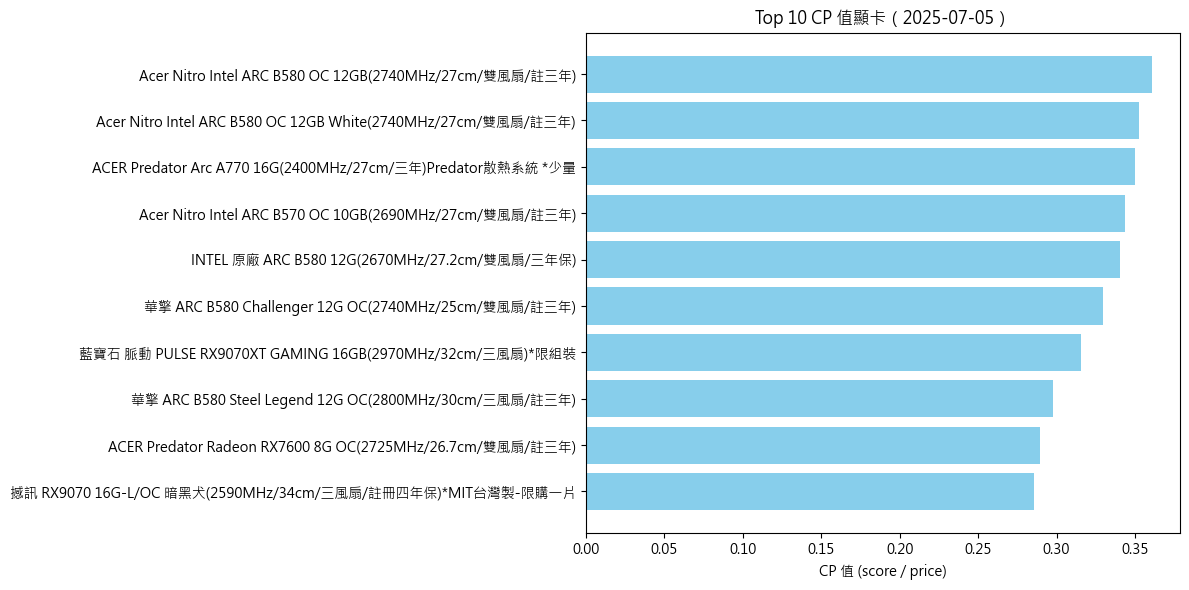

In [7]:
# 圖1: Top 10 顯卡的 CP 值長條圖
plt.figure(figsize=(12, 6))
plt.barh(top_10_cp["product"], top_10_cp["CP"], color='skyblue')
plt.xlabel("CP 值 (score / price)")
plt.title("Top 10 CP 值顯卡（2025-07-05）")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

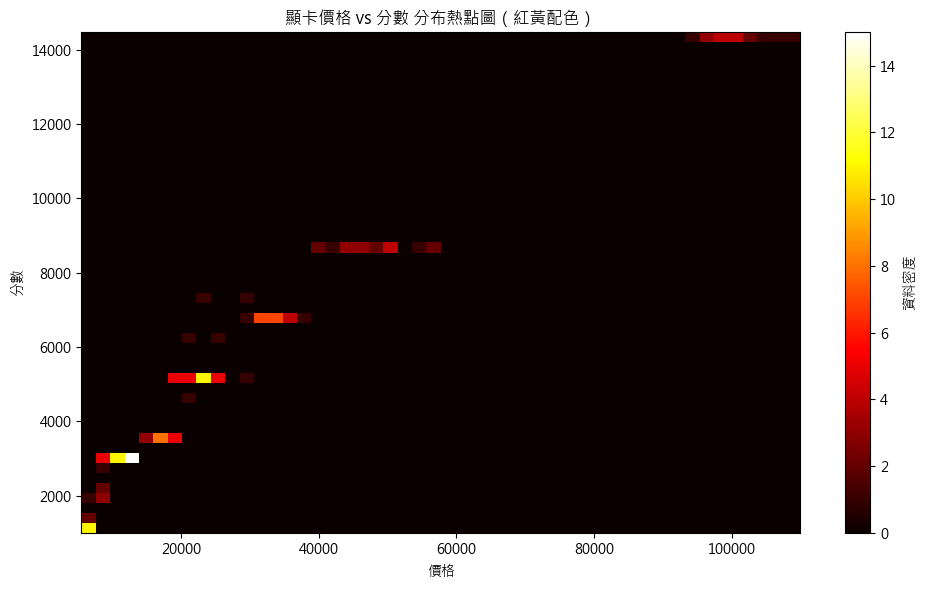

In [8]:
# 畫圖：使用 "hot" 配色的 2D 直方熱點圖
plt.figure(figsize=(10, 6))
plt.hist2d(
    latest_df["price"],
    latest_df["score"],
    bins=50,
    cmap="hot"
)
plt.colorbar(label="資料密度")
plt.title("顯卡價格 vs 分數 分布熱點圖（紅黃配色）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.tight_layout()
plt.show()

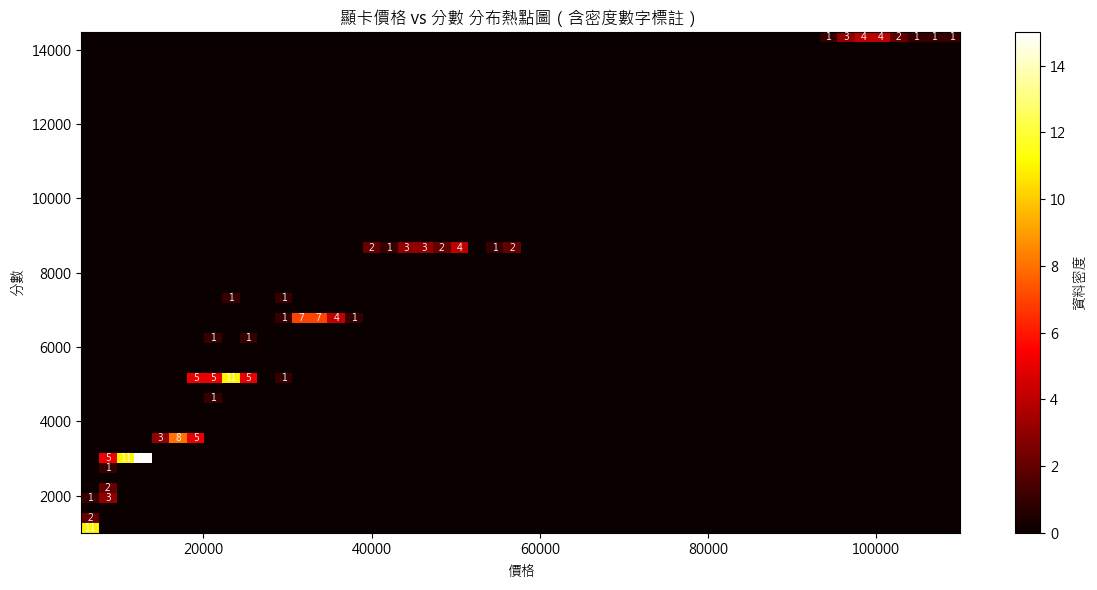

In [9]:
import numpy as np

# 建立 2D 直方圖並取得數值資料
plt.figure(figsize=(12, 6))
counts, xedges, yedges, im = plt.hist2d(
    latest_df["price"],
    latest_df["score"],
    bins=50,
    cmap="hot"
)

# 加上 colorbar
plt.colorbar(label="資料密度")

# 加上文字標註每個格子的 count 數量（只顯示非 0）
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        count = int(counts[i, j])
        if count > 0:
            plt.text(
                (xedges[i] + xedges[i+1]) / 2,
                (yedges[j] + yedges[j+1]) / 2,
                str(count),
                ha='center',
                va='center',
                fontsize=7,
                color='white'
            )

plt.title("顯卡價格 vs 分數 分布熱點圖（含密度數字標註）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.tight_layout()
plt.show()

## 發現有離群值資料

In [11]:
# 依照價格排序取前10名
top_10_price = latest_df.sort_values(by="price", ascending=False).head(10)
top_10_price

,date,chipset,product,price,pure_chipset,score,CP
44128,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-LC-RTX5090-O32G-GAMING(2610MHz/2...,109990,NVIDIA GeForce RTX 5090,14469.0,0.131548
41336,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-GAMING(2610MHz/36cm...,105990,NVIDIA GeForce RTX 5090,14469.0,0.136513
40347,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM LIQUID SOC(2580MHz/28cm/...,103990,NVIDIA GeForce RTX 5090,14469.0,0.139138
39427,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE WB 32G(開放式水...,102990,NVIDIA GeForce RTX 5090,14469.0,0.140489
39428,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE 32G(水冷/註冊五年...,102990,NVIDIA GeForce RTX 5090,14469.0,0.140489
37687,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER ICE 32G(2655MHz/36cm/註...,100990,NVIDIA GeForce RTX 5090,14469.0,0.143272
36618,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM SOC(2580MHz/36cm/三風扇/註冊五...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
36619,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),華碩 TUF-RTX5090-O32G-GAMING(2580MHz/35cm/三風扇/註冊...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
36620,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER 32G(2655MHz/36cm/三風扇/註...,99990,NVIDIA GeForce RTX 5090,14469.0,0.144704
35907,2025-07-05,NVIDIA RTX5090-32GB(GDDR7),ZOTAC RTX5090 AMP Extreme INFINITY(2467MHz/34c...,98990,NVIDIA GeForce RTX 5090,14469.0,0.146166


In [12]:
timeseries_df = df[df["score"].notna()].copy()

# 按日期統計平均價格、分數、CP值與樣本數
daily_stats = timeseries_df.groupby("date").agg(
    avg_price=("price", "mean"),
    avg_score=("score", "mean"),
    avg_cp=("CP", "mean"),
    count=("price", "count")
).reset_index()

In [13]:
daily_stats

,date,avg_price,avg_score,avg_cp,count
0,2020-01-05,14077.432836,1706.407960,0.128234,201
1,2020-01-07,14070.020000,1708.270000,0.128456,200
2,2020-01-09,14216.905941,1726.430693,0.128572,202
3,2020-01-10,14173.916256,1722.985222,0.128816,203
4,2020-01-12,14123.844221,1708.060302,0.128461,199
...,...,...,...,...,...
410,2025-06-25,30247.103448,5722.917241,0.218263,145
411,2025-06-28,31004.155844,5861.857143,0.216514,154
412,2025-06-30,31109.605263,5870.039474,0.216312,152
413,2025-07-04,30756.753247,5811.941558,0.217153,154


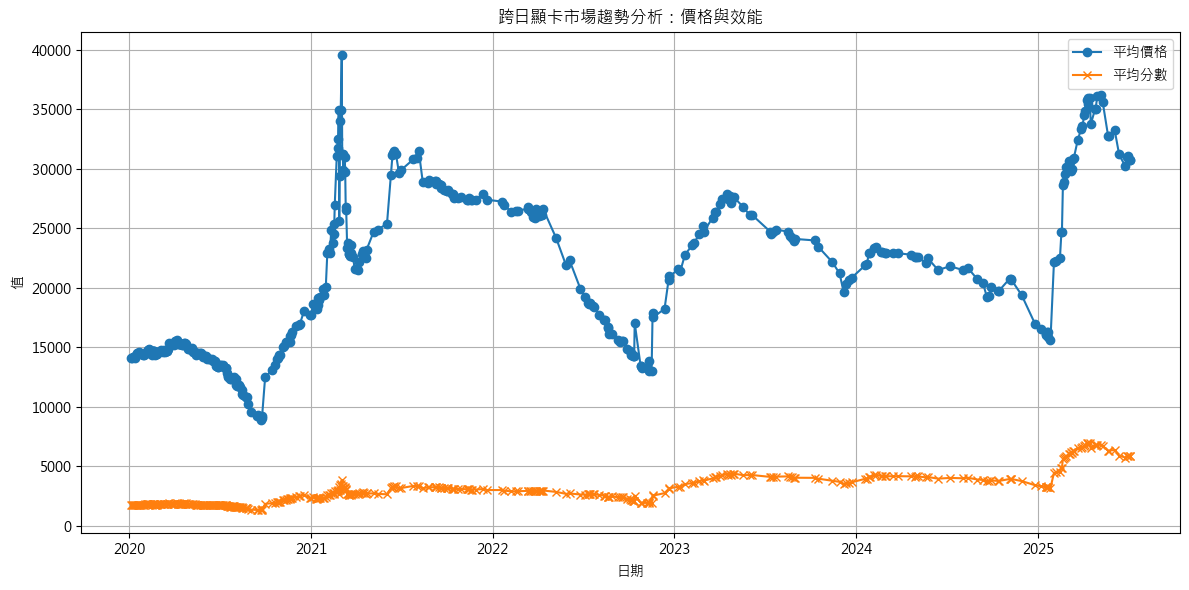

In [14]:
# 畫圖1：平均價格與分數
plt.figure(figsize=(12, 6))
plt.plot(daily_stats["date"], daily_stats["avg_price"], marker='o', label="平均價格")
plt.plot(daily_stats["date"], daily_stats["avg_score"], marker='x', label="平均分數")
plt.title("跨日顯卡市場趨勢分析：價格與效能")
plt.xlabel("日期")
plt.ylabel("值")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

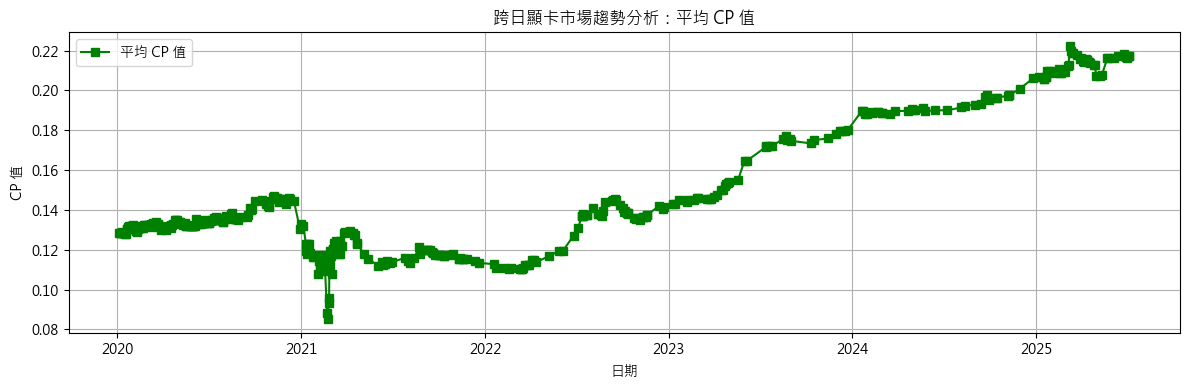

In [15]:
# 畫圖2：CP 值趨勢
plt.figure(figsize=(12, 4))
plt.plot(daily_stats["date"], daily_stats["avg_cp"], marker='s', color='green', label="平均 CP 值")
plt.title("跨日顯卡市場趨勢分析：平均 CP 值")
plt.xlabel("日期")
plt.ylabel("CP 值")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

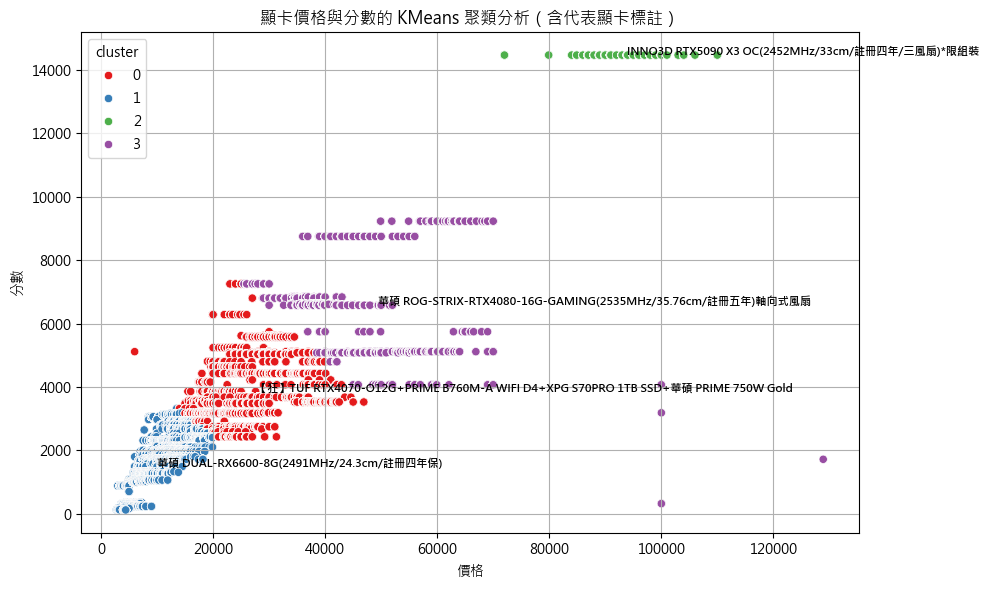

In [8]:
# 取出要聚類的欄位
clustering_df = df[["price", "score"]].copy()

# 標準化處理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_df)

# 建立並執行 KMeans 模型（分為 4 群）
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clustering_df["cluster"] = kmeans.fit_predict(scaled_data)

# 合併回原資料以取得名稱
df_with_cluster = df.copy()
df_with_cluster["cluster"] = clustering_df["cluster"]

# 找出每個群距離群中心最近的顯卡（代表顯卡）
centers = kmeans.cluster_centers_
rep_cards = []

for cluster_id in range(kmeans.n_clusters):
    cluster_points = scaled_data[clustering_df["cluster"] == cluster_id]
    center = centers[cluster_id]
    distances = np.linalg.norm(cluster_points - center, axis=1)
    min_idx = np.argmin(distances)
    
    # 找到在 df_with_cluster 中對應的那一筆
    rep_row = df_with_cluster[df_with_cluster["cluster"] == cluster_id].iloc[min_idx]
    rep_cards.append(rep_row)

# 畫圖
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clustering_df,
    x="price",
    y="score",
    hue="cluster",
    palette="Set1"
)

# 在圖上標註每群代表顯卡
for card in rep_cards:
    plt.text(
        card["price"], card["score"],
        card["product"],  # 如果想用 pure_chipset 改成 card["pure_chipset"]
        fontsize=8,
        weight="bold",
        color="black"
    )

plt.title("顯卡價格與分數的 KMeans 聚類分析（含代表顯卡標註）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
conn.close()